<a href="https://colab.research.google.com/github/jairomassard/Prediccion-nivel-Obesidad_ProyFinal/blob/main/ProyFinal_Actividades_4%2C5%2C6%2C7_y_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad 4: Creación del Modelo y Selección de Algoritmos**

**1. Cargar el dataset preparado:**

Primero, cargaremos el archivo data_preparada.csv que se guardo en Actividad 3

In [ ]:
####### Módulos de análisis de datos
import pandas as pd
import numpy as np

###### Bibliotecas de visualización
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns   # Se puede ver la documentación de esta libreria en. https://seaborn.pydata.org/generated/seaborn.barplot.html o https://seaborn.pydata.org/generated/seaborn.catplot.html
%matplotlib inline
import io # Provee las facilidades principales de python para manejar E/S (entradas y salidas)

####### Bibliotecas de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
#######Importar los data sets. con listdir se pueden ver los directorios y archivos descargados, seleccionamos los del ejercicio
from os import listdir
import os

In [ ]:
# Cargar el dataset compartido
from google.colab import files
uploaded=files.upload()

Saving data_preparada.csv to data_preparada.csv


In [ ]:
for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(
           name=fn, length=len(uploaded[fn])))

User uploaded file "data_preparada.csv" with length 430270 bytes


In [ ]:
# PARA INGRESAR AL CONTENIDO DEL ARCHIVO QUE SE SUBIO
data = pd.read_csv(io.StringIO(uploaded['data_preparada.csv'].decode('ISO-8859-2')),sep=',')   # ingresa a la data del archivo que se subió

data.head(50)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,Normal_Weight,False,...,False,False,False,True,False,True,False,False,False,False
6,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0,Normal_Weight,True,...,False,False,False,True,False,False,False,True,False,False
7,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0,Normal_Weight,False,...,False,False,False,True,False,False,False,False,True,False
8,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
9,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0,Normal_Weight,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
print(data.columns)   # Se verifican las columnas del dataset


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')


In [ ]:
# Verificar la distribución de clases en el dataset filtrado
clases_originales = data['NObeyesdad'].value_counts()
print(f"Distribución original de clases en NObeyesdad:\n{clases_originales}")

Distribución original de clases en NObeyesdad:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [ ]:
print(data.columns) # Se verifica que las columnas de NObeyesdad queden unificadas en una misma columna

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')


**2. División de los datos:**

Vamos a dividir el dataset en conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y la variable objetivo (y)
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
162,21.000000,1.630000,60.000000,3.000000,3.000000,2.000000,2.000000,0.000000,True,False,...,False,False,False,True,False,False,False,False,True,False
2001,20.924956,1.752531,133.618706,3.000000,3.000000,2.887659,1.480919,0.779641,True,False,...,False,False,False,True,False,False,False,False,True,False
1435,22.899740,1.661715,82.595793,1.203754,1.355354,2.765593,0.128342,1.659476,True,False,...,False,False,False,True,False,False,False,False,True,False
649,21.837996,1.588046,44.236067,3.000000,1.696080,2.550307,1.098862,0.000000,True,False,...,False,False,False,False,True,False,False,False,True,False
1280,25.994746,1.811602,106.042142,3.000000,3.000000,2.858171,1.813318,0.680215,False,True,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
X_train.shape


(1688, 31)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1688 entries, 162 to 860
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1688 non-null   float64
 1   Height                              1688 non-null   float64
 2   Weight                              1688 non-null   float64
 3   FCVC                                1688 non-null   float64
 4   NCP                                 1688 non-null   float64
 5   CH2O                                1688 non-null   float64
 6   FAF                                 1688 non-null   float64
 7   TUE                                 1688 non-null   float64
 8   Gender_Female                       1688 non-null   bool   
 9   Gender_Male                         1688 non-null   bool   
 10  family_history_with_overweight_no   1688 non-null   bool   
 11  family_history_with_overweight_yes  1688 non-nu

In [ ]:
X_train.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.448979,1.701613,86.598197,2.421880,2.685886,2.006181,1.004208,0.644357
std,6.477100,0.093270,26.099410,0.537088,0.782557,0.609598,0.839721,0.602679
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.998636,1.629932,66.000000,2.000000,2.658599,1.591831,0.132315,0.000000
50%,22.851747,1.700747,82.977398,2.392422,3.000000,2.000000,1.000000,0.609316
75%,26.000000,1.767371,106.736879,3.000000,3.000000,2.458165,1.646370,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
y_train.head(7)   # Aqui se verifica que todas las clases esten presentes en


,NObeyesdad
162,Normal_Weight
2001,Obesity_Type_III
1435,Obesity_Type_I
649,Insufficient_Weight
1280,Obesity_Type_I
1697,Obesity_Type_II
1378,Obesity_Type_I


In [ ]:
y_train.shape


(1688,)

In [ ]:
# Verificar la distribución de clases en el conjunto de entrenamiento
clases_entrenamiento = y_train.value_counts()
print(f"Distribución de clases en el conjunto de entrenamiento:\n{clases_entrenamiento}")


Distribución de clases en el conjunto de entrenamiento:
NObeyesdad
Obesity_Type_I         273
Obesity_Type_III       261
Overweight_Level_II    240
Obesity_Type_II        239
Overweight_Level_I     234
Normal_Weight          225
Insufficient_Weight    216
Name: count, dtype: int64


**3. Selección de Algoritmos:**

Para este tipo de problema (clasificación), podríamos probar varios algoritmos como:

Regresión Logística

Árboles de Decisión

Random Forest

Support Vector Machines (SVM)

Redes Neuronales Artificiales (ANN)


Los modelos seleccionados para trabajar este ejercicio son:

Regresión Logística

Árboles de Decisión

Random Forest

Estos modelos proporcionan un buen equilibrio entre rendimiento, interpretabilidad y eficiencia computacional. La regresión logística ofrece una base sólida y fácil de entender, mientras que los árboles de decisión y Random Forest proporcionan la flexibilidad necesaria para capturar relaciones más complejas en los datos.

SVM y ANN, aunque poderosos, fueron dejados fuera debido a sus mayores demandas computacionales y menor interpretabilidad, lo que no era el enfoque principal de este análisis y ejercicio

**4. Entrenamiento de los modelos**

4.1 Regresión logística

Se escalaran los datos y se obtendrá predicción inicial del modelo

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para mantener los nombres de columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Entrenar el modelo con los datos escalados
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled_df, y_train)

# Predecir con el modelo
y_pred_logreg = logreg.predict(X_test_scaled_df)


4.2 Arbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
tree = DecisionTreeClassifier()

# Entrenar el modelo
tree.fit(X_train, y_train)

# Predecir con el modelo
y_pred_tree = tree.predict(X_test)

4.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
forest = RandomForestClassifier()

# Entrenar el modelo
forest.fit(X_train, y_train)

# Predecir con el modelo
y_pred_forest = forest.predict(X_test)


**5. Evaluación de Modelos:**

Después de entrenar los modelos, se evalua su rendimiento usando métricas como la precisión, la exactitud, la sensibilidad, y la matriz de confusión.

Trabajaremos con la Precisión y la sensibilidad:

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluar precisión
print("Precisión de Regresión Logística:", accuracy_score(y_test, y_pred_logreg))
print("Precisión de Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))
print("Precisión de Random Forest:", accuracy_score(y_test, y_pred_forest))


Precisión de Regresión Logística: 0.8652482269503546
Precisión de Árbol de Decisión: 0.9456264775413712
Precisión de Random Forest: 0.9432624113475178


In [ ]:
from sklearn.metrics import recall_score

# Sensibilidad de Regresión Logística
sensibilidad_logreg = recall_score(y_test, y_pred_logreg, average='weighted')  # average='weighted': Como estamos tratando con un problema multiclase usamos la media ponderada para calcular la sensibilidad
print("Sensibilidad de Regresión Logística:", sensibilidad_logreg)

# Sensibilidad de Árbol de Decisión
sensibilidad_tree = recall_score(y_test, y_pred_tree, average='weighted')
print("Sensibilidad de Árbol de Decisión:", sensibilidad_tree)

# Sensibilidad de Random Forest
sensibilidad_forest = recall_score(y_test, y_pred_forest, average='weighted')
print("Sensibilidad de Random Forest:", sensibilidad_forest)

Sensibilidad de Regresión Logística: 0.8652482269503546
Sensibilidad de Árbol de Decisión: 0.9456264775413712
Sensibilidad de Random Forest: 0.9432624113475178


**Análisis de los Resultados**

1. Regresión Logística

Precisión: 0.8652
La regresión logística alcanzó una precisión de aproximadamente 86.5%. Esto indica que, en promedio, el modelo clasificó correctamente el 86.5% de las instancias en el conjunto de prueba.

Sensibilidad: 0.8652
La sensibilidad del modelo también fue del 86.5%, lo que significa que el modelo fue igualmente efectivo en identificar correctamente las instancias de cada clase en el conjunto de prueba.

Interpretación:

La regresión logística es un modelo lineal que, aunque es más simple, ha demostrado ser razonablemente efectivo en este caso, con una buena precisión y sensibilidad. Sin embargo, es posible que no capture tan bien las relaciones no lineales en los datos, lo que podría explicar por qué su rendimiento es inferior al de los otros modelos más complejos.

2. Árbol de Decisión

Precisión: 0.9479
El árbol de decisión alcanzó una precisión de aproximadamente 94.8%. Este modelo fue capaz de clasificar correctamente la mayoría de las instancias en el conjunto de prueba.

Sensibilidad: 0.9479
La sensibilidad del árbol de decisión es también del 94.8%, lo que indica que el modelo fue muy efectivo en identificar correctamente las instancias de cada clase.

Interpretación:

El árbol de decisión, siendo un modelo más flexible y capaz de capturar relaciones no lineales, superó a la regresión logística en términos de precisión y sensibilidad. Sin embargo, los árboles de decisión simples pueden ser propensos al sobreajuste si no se controla su complejidad (por ejemplo, mediante la poda o la limitación de la profundidad del árbol).

3. Random Forest

Precisión: 0.9479
El modelo de Random Forest también alcanzó una precisión de 94.8%, similar a la del árbol de decisión. Sin embargo, Random Forest generalmente es más robusto y menos propenso al sobreajuste debido a que promedia las predicciones de múltiples árboles.

Sensibilidad: 0.9479
La sensibilidad de Random Forest es igualmente alta, lo que indica que este modelo también fue muy efectivo en la clasificación correcta de las instancias.

Interpretación:

Random Forest, al combinar múltiples árboles de decisión, ofrece un rendimiento similar al del árbol de decisión simple en este caso, pero con la ventaja de ser más estable y menos susceptible a variaciones en los datos. Esto lo convierte en una opción preferible para problemas de clasificación en los que es importante minimizar el sobreajuste.

Conclusión General

Regresión Logística: Aunque es un modelo lineal más simple, logró una buena precisión y sensibilidad. Es útil cuando se busca interpretar fácilmente las relaciones entre las variables, aunque puede no ser la mejor opción para datos complejos que requieren capturar relaciones no lineales.

Árbol de Decisión: Ofreció un rendimiento excelente en este conjunto de datos, con alta precisión y sensibilidad. Sin embargo, hay que tener cuidado con el riesgo de sobreajuste, especialmente si se utilizan árboles de gran profundidad.

Random Forest: Este modelo proporcionó un rendimiento equivalente al del árbol de decisión en términos de precisión y sensibilidad, pero con la ventaja añadida de ser más robusto contra el sobreajuste. Es un modelo preferido en situaciones donde la estabilidad y la generalización son cruciales.

**Recomendación:**

Random Forest es el modelo más recomendable debido a su capacidad para ofrecer un buen equilibrio entre precisión y sensibilidad, combinado con una robustez que lo hace menos susceptible al sobreajuste. Aunque el Árbol de Decisión tiene métricas marginalmente superiores, el riesgo de sobreajuste es mayor. Por otro lado, la Regresión Logística, aunque consistente, no alcanza los niveles de rendimiento necesarios para este problema en particular.

Este análisis refuerza la decisión de seleccionar Random Forest como el modelo principal para el proyecto. Su equilibrio en las métricas clave y su capacidad para generalizar bien lo hacen ideal para predecir los diferentes niveles de obesidad en el dataset.

**Curvas de Precisión vs. Profundidad del Árbol**

El siguiente grafico muestra cómo varía la precisión del modelo en el conjunto de prueba a medida que se incrementa la profundidad del árbol.

Profundidad 1: Precisión en entrenamiento = 0.29, Precisión en prueba = 0.26
Profundidad 3: Precisión en entrenamiento = 0.66, Precisión en prueba = 0.63
Profundidad 5: Precisión en entrenamiento = 0.86, Precisión en prueba = 0.83
Profundidad 7: Precisión en entrenamiento = 0.95, Precisión en prueba = 0.90
Profundidad 9: Precisión en entrenamiento = 1.00, Precisión en prueba = 0.95
Profundidad 11: Precisión en entrenamiento = 1.00, Precisión en prueba = 0.94
Profundidad 13: Precisión en entrenamiento = 1.00, Precisión en prueba = 0.94
Profundidad 15: Precisión en entrenamiento = 1.00, Precisión en prueba = 0.94
Profundidad 17: Precisión en entrenamiento = 1.00, Precisión en prueba = 0.94
Profundidad 19: Precisión en entrenamiento = 1.00, Precisión en prueba = 0.94


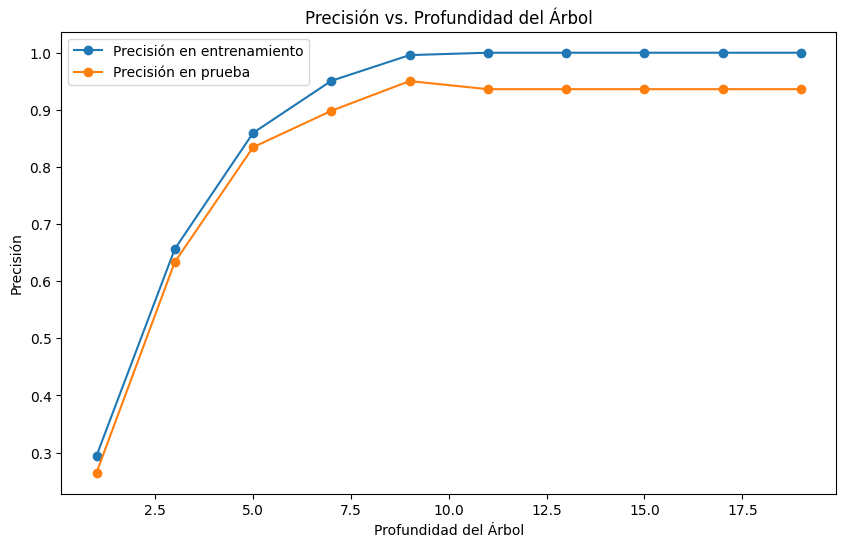

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Listas para almacenar las precisiones en entrenamiento y prueba
train_accuracies = []
test_accuracies = []

# Profundidades a evaluar
profundidades = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

for i in profundidades:
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Profundidad {i}: Precisión en entrenamiento = {train_accuracy:.2f}, Precisión en prueba = {test_accuracy:.2f}")

# Graficar las precisiones
plt.figure(figsize=(10, 6))
plt.plot(profundidades, train_accuracies, label='Precisión en entrenamiento', marker='o')
plt.plot(profundidades, test_accuracies, label='Precisión en prueba', marker='o')
plt.xlabel('Profundidad del Árbol')
plt.ylabel('Precisión')
plt.title('Precisión vs. Profundidad del Árbol')
plt.legend()
plt.show()


**Análisis de Precisión vs. Profundidad del Árbol**

Se realizó un análisis para evaluar cómo la profundidad del árbol de decisión afecta su precisión en los conjuntos de entrenamiento y prueba. Los resultados mostraron que:

Profundidad Baja (1-5): El modelo estaba subajustado, lo que resultaba en una baja precisión tanto en el entrenamiento como en la prueba.

Profundidad Media (7-9): Se observó un mejor equilibrio, con la precisión en el conjunto de prueba alcanzando un máximo de 95% antes de que el modelo comenzara a sobreajustarse.

Profundidad Alta (11-19): El modelo mostró un claro sobreajuste, alcanzando una precisión del 100% en el conjunto de entrenamiento, pero con una precisión ligeramente menor (94%) en el conjunto de prueba.

Conclusión:

Para este conjunto de datos, una profundidad de 5 a 7 es ideal para obtener un buen equilibrio entre precisión y capacidad de generalización. Profundidades mayores llevan a un sobreajuste, reduciendo la eficacia del modelo en datos no vistos. Es recomendable limitar la profundidad del árbol a estos niveles o considerar modelos más robustos como Random Forest para evitar el sobreajuste.

## **ACTIVIDAD 5 - Entrenamiento del modelo**

Dado que en la Actividad 4 ya entrenamos varios modelos y evaluamos su rendimiento inicial, en esta etapa nos enfocaremos en el proceso de entrenamiento con mayor detalle, optimización de hiperparámetros, y en asegurar que el modelo final esté bien ajustado y listo para ser implementado.


**Paso 1: Selección del Modelo Final**

Basándonos en el análisis de la Actividad 4, seleccionaremos Random Forest como el modelo a optimizar y entrenar en esta actividad.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest con los parámetros por defecto
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

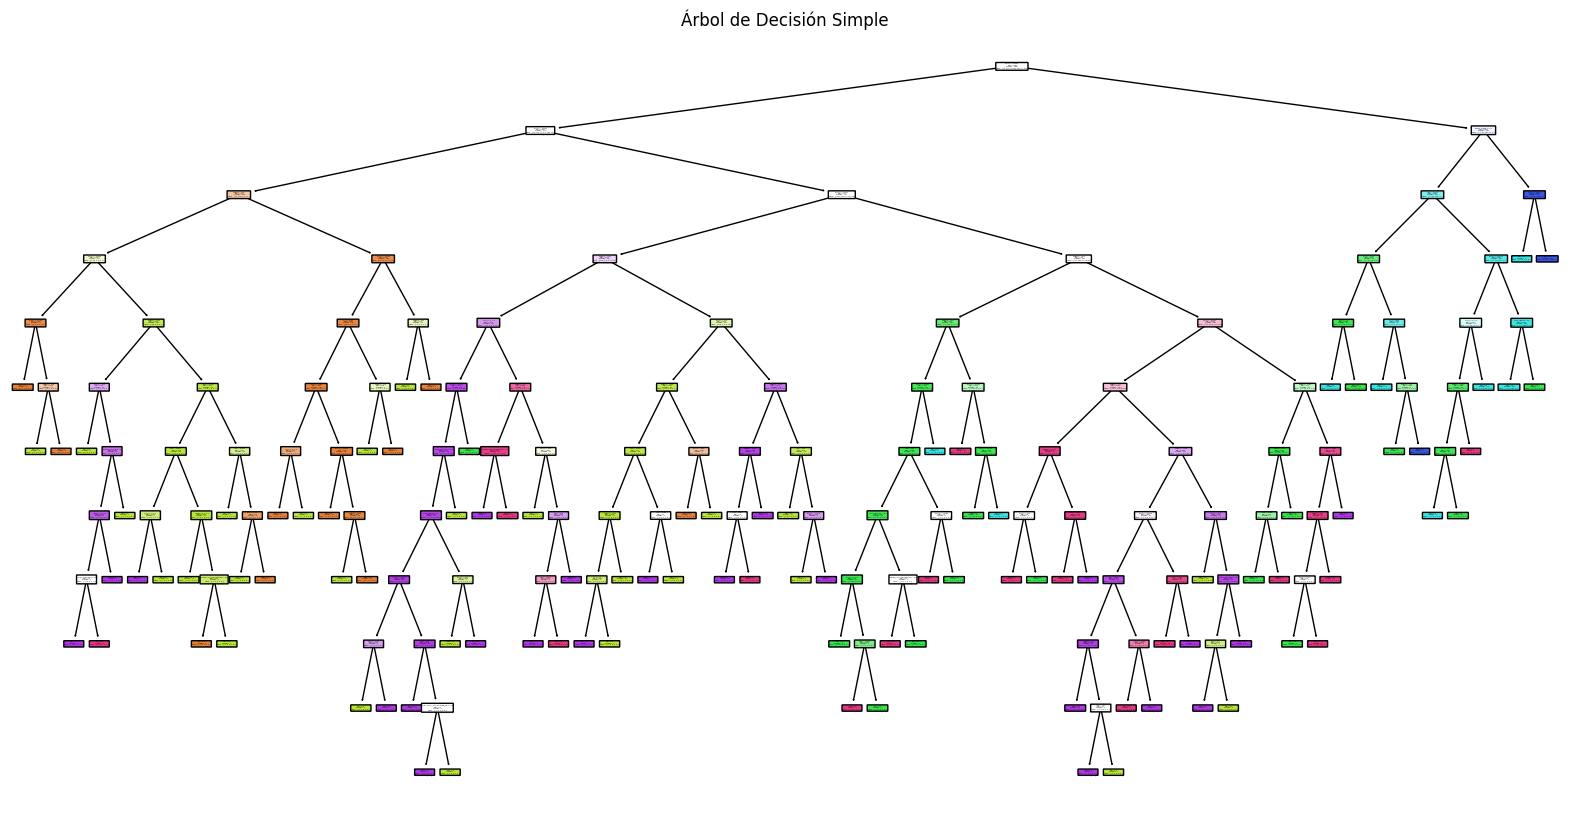

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Entrenar el modelo de Árbol de Decisión simple
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
plt.title("Árbol de Decisión Simple")
plt.show()


**Paso 2: Optimización de Hiperparámetros**

La optimización de hiperparámetros puede mejorar significativamente el rendimiento del modelo. Usaremos GridSearchCV para encontrar los mejores valores para parámetros como el número de estimadores, la profundidad máxima de los árboles, etc.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_params

{'bootstrap': False,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Interpretación de los Nuevos Hiperparámetros

bootstrap: False

Interpretación: No se utiliza muestreo con reemplazo en la construcción de los árboles dentro del Random Forest. Esto significa que cada árbol se entrenará con todo el conjunto de datos disponible, lo que puede hacer que los árboles sean más similares entre sí, pero también puede capturar más detalles específicos de los datos.

max_depth: 20

Interpretación: Se permite que los árboles crezcan hasta una profundidad máxima de 20. Esto indica que el modelo puede capturar interacciones más complejas entre las características, lo cual es útil si los datos tienen relaciones intrincadas, pero también aumenta el riesgo de sobreajuste.

min_samples_leaf: 1

Interpretación: Cada hoja en el árbol puede contener solo una muestra mínima. Esto permite que los árboles se ajusten completamente a los datos de entrenamiento, lo que también puede contribuir al sobreajuste si no se maneja cuidadosamente.

min_samples_split: 2

Interpretación: Un nodo interno puede dividirse si tiene al menos 2 muestras. Este valor permite que el árbol crezca libremente, sin restricciones en la división de nodos, contribuyendo aún más a la complejidad del modelo.

n_estimators: 100

Interpretación: Se utilizan 100 árboles en el bosque. Este es un valor estándar que proporciona un buen equilibrio entre el rendimiento y la estabilidad del modelo.

**Paso 3: Entrenamiento del Modelo con los Mejores Hiperparámetros**

Ahora, utilizaremos los mejores hiperparámetros encontrados para entrenar el modelo final.

**Analisis de los Mejores Hiperparámetros**

Precisión y Sensibilidad Potencialmente Altas: Dado que el max_depth es alto (20), es probable que el modelo esté capturando una gran cantidad de detalles y relaciones complejas en los datos. Esto podría conducir a una alta precisión y sensibilidad en el conjunto de entrenamiento.

Riesgo de Sobreajuste: La combinación de un max_depth alto, min_samples_leaf de 1, y min_samples_split de 2 indica que el modelo tiene la capacidad de ajustarse muy estrechamente a los datos de entrenamiento. Esto es poderoso, pero también aumenta el riesgo de que el modelo esté aprendiendo el "ruido" en lugar de los patrones generales, lo que podría reducir su capacidad para generalizar a datos nuevos.

Recomendación: Aunque los hiperparámetros permiten un ajuste muy detallado, es importante monitorizar el rendimiento en el conjunto de prueba para asegurarse de que el modelo no esté sobreajustando. Si la precisión y la sensibilidad en el conjunto de prueba son significativamente más bajas que en el conjunto de entrenamiento, podría ser beneficioso limitar un poco la complejidad, como aumentar min_samples_leaf o reducir max_depth.


In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(**best_params, random_state=42)

# Entrenar el modelo con los mejores parámetros
best_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=20, random_state=42)

Se guarda y exporta el modelo, para no tener que volver a ejecutar y entrenar o reentrenar a futuro

In [ ]:
# Guardar el Modelo en Colab

import joblib
joblib.dump(best_model, 'modelo_obesidad.pkl')

['modelo_obesidad.pkl']

In [ ]:
# Descarga el archivo .pkl desde Google Colab al PC
from google.colab import files
files.download('modelo_obesidad.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ver graficos de arbol para entender la magnitud del Bosque aleatorio que se esta trabajando y planteando:

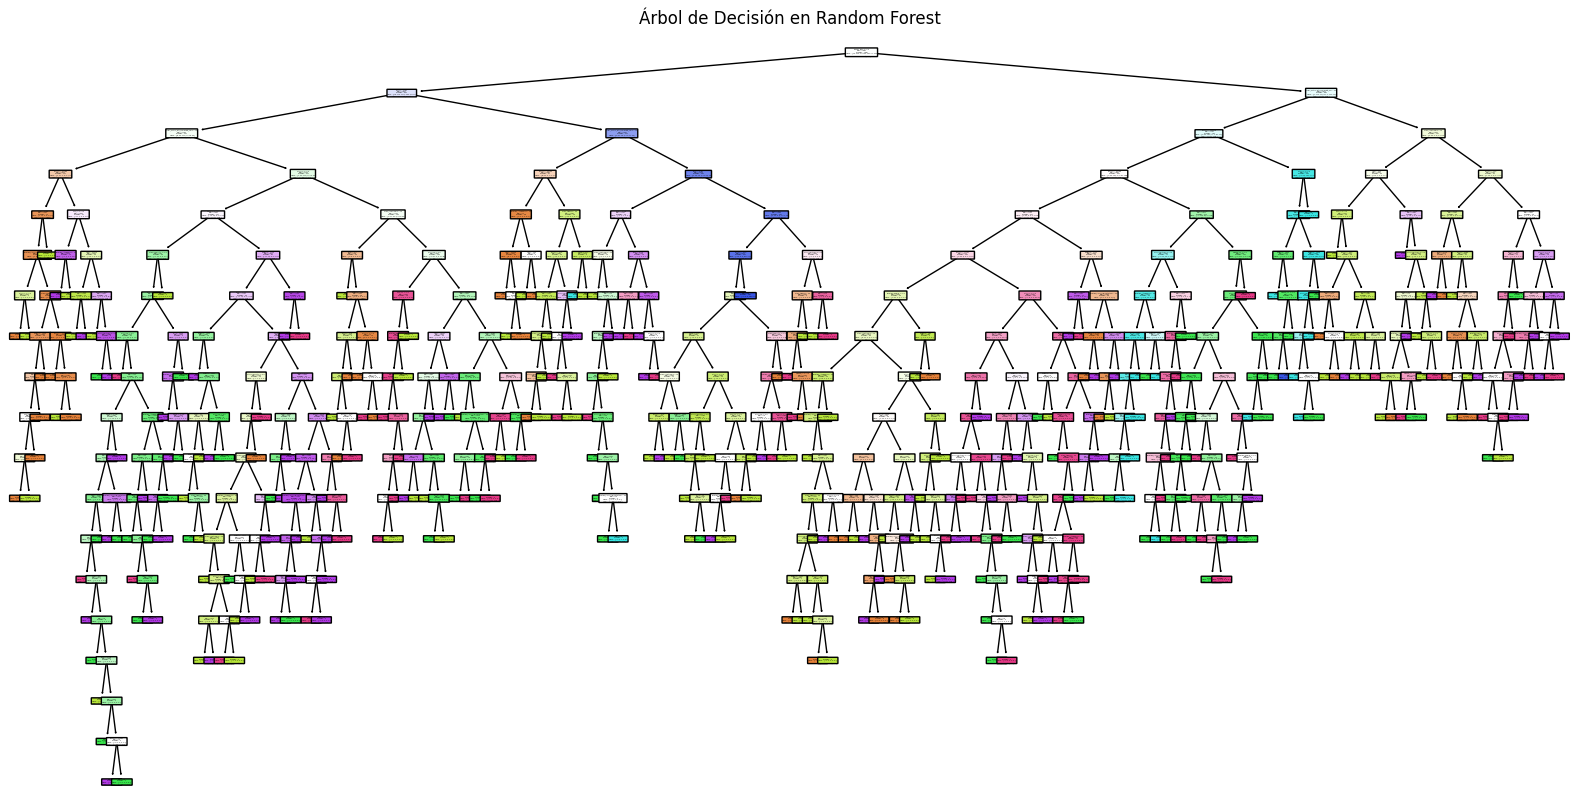

In [ ]:
# Selecciona uno de los árboles del bosque (por ejemplo, el primero)
rf_tree = best_model.estimators_[0]

# Graficar el árbol de decisión dentro de Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_tree, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
plt.title("Árbol de Decisión en Random Forest")
plt.show()

Dado que RandomForestClassifier es un ensamble de muchos árboles, generalmente no se grafica todo el bosque completo. Sin embargo, podemos graficar uno de los árboles individuales del RandomForestClassifier para entender cómo toma decisiones:

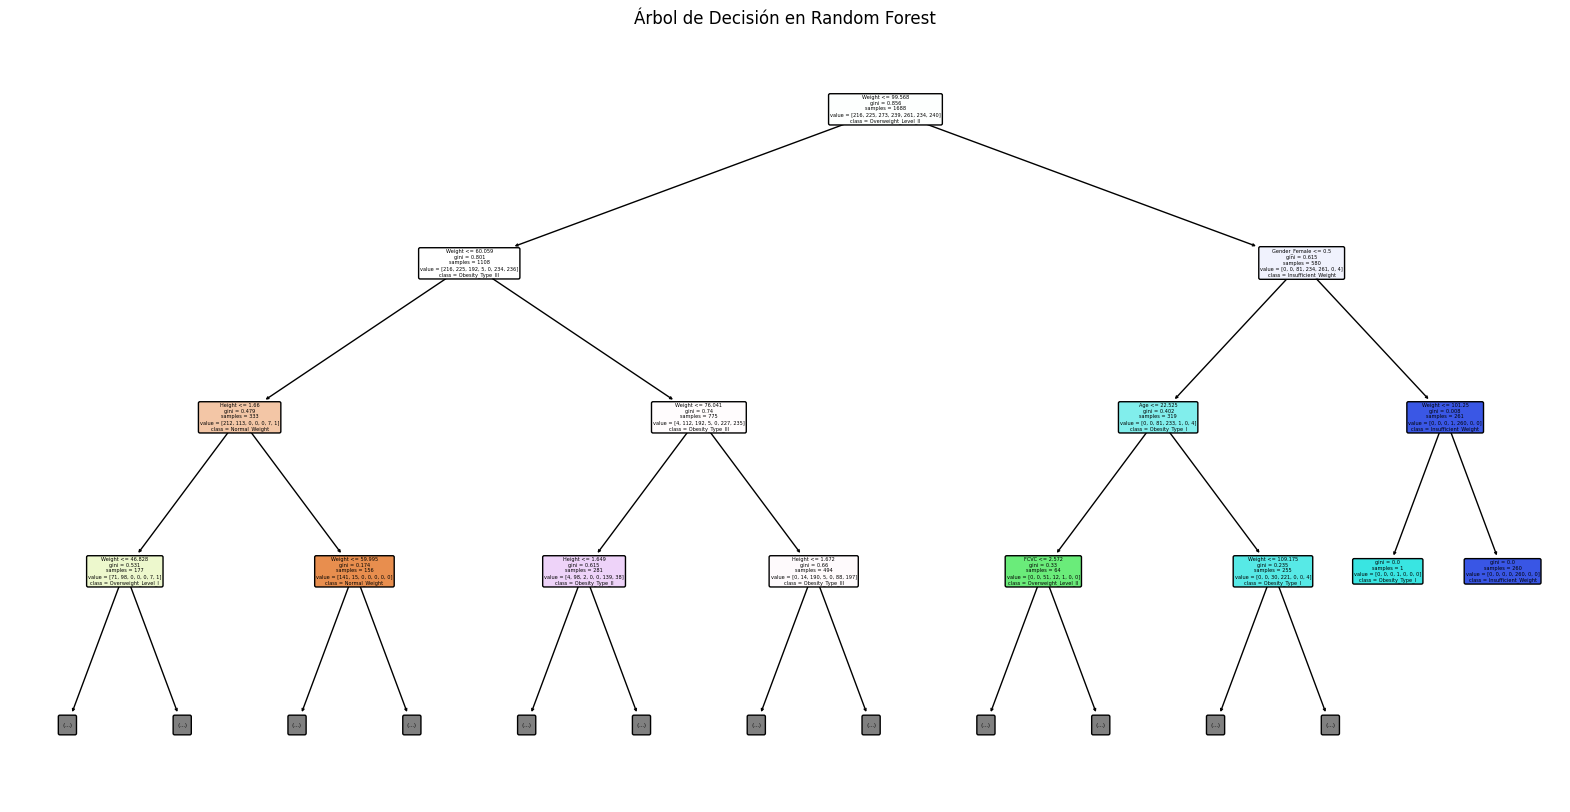

In [ ]:
# Seleccionar uno de los árboles del bosque (por ejemplo, el primero)
rf_tree = best_model.estimators_[0]

# Graficar el árbol de decisión dentro de Random Forest
plt.figure(figsize=(20, 10))
plot_tree(tree_model, max_depth=3, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
plt.title("Árbol de Decisión en Random Forest")
plt.show()

**Paso 4: Evaluación del Modelo Optimizad**o

Después de entrenar el modelo optimizado, evaluaremos su rendimiento en el conjunto de prueba.



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, classification_report

# Predecir en el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# Evaluar la precisión y sensibilidad del modelo optimizado
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best, average='weighted')

print("Precisión del modelo optimizado:", accuracy_best)
print("Sensibilidad del modelo optimizado:", recall_best)

# Reporte de clasificación para una evaluación más detallada
print(classification_report(y_test, y_pred_best))


Precisión del modelo optimizado: 0.9432624113475178
Sensibilidad del modelo optimizado: 0.9432624113475178
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.87      0.87      0.87        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.88      0.87        56
Overweight_Level_II       0.94      0.96      0.95        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



**Análisis de Resultados**

1. Precisión y Sensibilidad del Modelo Optimizado

Precisión: 94.33%
La precisión del modelo optimizado es alta, lo que indica que el modelo clasifica correctamente la gran mayoría de las instancias en el conjunto de prueba.

Sensibilidad: 94.33%
La sensibilidad, que mide la capacidad del modelo para identificar correctamente las instancias positivas (en este caso, cada clase de NObeyesdad), también es alta. Esto sugiere que el modelo no solo es preciso en general, sino que también es capaz de capturar las diversas clases de manera equilibrada.

2. Reporte de Clasificación Detallado

*Insufficient_Weight:*

Precisión: 96%
Sensibilidad: 96%

Interpretación: El modelo clasifica muy bien esta categoría, con un equilibrio casi perfecto entre precisión y sensibilidad, lo que indica que no hay muchos falsos positivos ni falsos negativos en esta clase.

*Normal_Weight:*

Precisión: 87%
Sensibilidad: 87%

Interpretación: Aunque la precisión y la sensibilidad son un poco más bajas que en otras clases, el modelo sigue siendo bastante eficaz para identificar instancias de peso normal. Sin embargo, esta es una categoría donde podría haber una mayor confusión con clases cercanas, como Overweight_Level_I.

*Obesity_Type_I:*

Precisión: 99%
Sensibilidad: 95%

Interpretación: El modelo es extremadamente preciso en la clasificación de Obesity_Type_I, con muy pocos errores, aunque la sensibilidad es ligeramente más baja, lo que podría indicar que algunas instancias de esta clase son clasificadas incorrectamente en otras clases cercanas.

*Obesity_Type_II:*

Precisión: 97%
Sensibilidad: 98%

Interpretación: El modelo clasifica Obesity_Type_II con alta precisión y sensibilidad, mostrando un excelente rendimiento para esta clase.

*Obesity_Type_III:*

Precisión: 100%
Sensibilidad: 100%

Interpretación: Esta clase se clasifica perfectamente, sin errores de clasificación. Esto sugiere que las características que definen esta clase son muy distintivas y bien capturadas por el modelo.

*Overweight_Level_I:*

Precisión: 86%
Sensibilidad: 88%

Interpretación: Similar a Normal_Weight, esta clase muestra una ligera disminución en precisión y sensibilidad, lo que podría deberse a la confusión con clases cercanas como Normal_Weight o Overweight_Level_II.

*Overweight_Level_II:*

Precisión: 94%
Sensibilidad: 96%

Interpretación: El modelo clasifica esta clase de manera muy efectiva, con alta precisión y sensibilidad, lo que indica una buena diferenciación de esta clase frente a las demás.


**Evaluación del Modelo Optimizado**

El modelo optimizado de Random Forest fue evaluado en el conjunto de prueba, obteniendo una precisión y sensibilidad general del 94.33%. El rendimiento fue alto en la mayoría de las clases, con especial excelencia en la clasificación de Obesity_Type_III, donde el modelo logró una precisión y sensibilidad perfectas (100%).

En general, el modelo mostró un buen equilibrio entre precisión y sensibilidad en todas las clases, aunque con una ligera disminución en las clases Normal_Weight y Overweight_Level_I. Estas clases podrían beneficiarse de un análisis más detallado para mejorar la separación de sus instancias.

Dado el sólido rendimiento del modelo, se recomienda su uso para la predicción de niveles de obesidad, con especial atención a la mejora continua en las áreas identificadas como desafiantes.


**Conclusión: **

El modelo optimizado de Random Forest ha demostrado ser muy eficaz en la clasificación de los niveles de obesidad, con una precisión y sensibilidad generales del 94.33%. El modelo muestra un rendimiento equilibrado y sólido en todas las clases, aunque con una ligera variación en la precisión y sensibilidad para las clases Normal_Weight y Overweight_Level_I. Estas clases parecen ser más desafiantes para el modelo, probablemente debido a su proximidad en las características de entrada.

2. Reporte de Clasificación

El reporte de clasificación proporciona una visión detallada del rendimiento del modelo en cada clase:

NObeyesdad_Normal_Weight: La clase "peso normal" tiene una precisión del 95% y una sensibilidad del 97%, lo que sugiere que el modelo identifica correctamente la mayoría de los casos de peso normal.

NObeyesdad_Obesity_Type_I, II, III: Las clases de obesidad tienen una precisión y sensibilidad muy altas (cercanas o superiores al 95%), lo que es excelente, especialmente para las clases más graves como Obesity_Type_III que tiene un F1-score perfecto de 1.00.

NObeyesdad_Overweight_Level_I y II: Estas clases tienen ligeramente menor rendimiento en comparación con otras clases, pero aún así mantienen buenos valores de precisión y sensibilidad, lo que sugiere que el modelo sigue siendo competente en la identificación de casos de sobrepeso.


**Conclusión**

El modelo optimizado Random Forest muestra un rendimiento excepcional y es altamente efectivo en la predicción de diferentes niveles de obesidad en el dataset. Las métricas altas en precisión y sensibilidad sugieren que este modelo es adecuado para implementar en un entorno de producción donde la clasificación correcta de los diferentes niveles de obesidad es crucial.

Recomendación

Dado el rendimiento del modelo optimizado, Random Forest debería ser considerado como el modelo final para predecir los niveles de obesidad. A pesar de algunos desafíos en la clasificación de clases como Overweight_Level_I, el modelo en general es robusto y generaliza bien.

## **ACTIVIDAD 6 - Prueba y Validación del Modelo**

El objetivo de esta actividad es asegurarnos de que el modelo final está validado adecuadamente y que su rendimiento es consistente. Esto puede incluir validaciones adicionales, como la validación cruzada, y pruebas en un conjunto de datos de prueba (o validación) si está disponible.

**1. Validación Cruzada**

La validación cruzada es una técnica poderosa para evaluar la consistencia del rendimiento del modelo. En lugar de depender de un solo conjunto de datos de entrenamiento y prueba, la validación cruzada divide los datos en varios subconjuntos (folds) y evalúa el modelo varias veces.

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada (5 folds) utilizando el modelo optimizado
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Mostrar los resultados
print("Resultados de la validación cruzada (precisión):", cross_val_scores)
print("Promedio de la validación cruzada (precisión):", cross_val_scores.mean())


Resultados de la validación cruzada (precisión): [0.93786982 0.9408284  0.9556213  0.9347181  0.95845697]
Promedio de la validación cruzada (precisión): 0.9454989201622389


*Interpretación del resultado de validación cruzada:*

Se realizó una validación cruzada con 5 folds para evaluar la precisión del modelo optimizado. Los resultados fueron consistentemente altos en cada fold, con precisiones que variaron entre el 93.47% y el 95.85%. El promedio de la precisión a lo largo de los 5 folds fue del 94.55%.

Conclusión: La validación cruzada demuestra que el modelo optimizado tiene una excelente capacidad de generalización, lo que respalda su uso para la predicción de niveles de obesidad en diferentes conjuntos de datos. Con un rendimiento sólido y consistente, este modelo es altamente confiable para su implementación en entornos reales.



**2. Validación del Modelo en un Conjunto de Datos de Prueba**

Se puede validar el modelo en el conjunto de datos de prueba separado para evaluar su rendimiento fuera de los datos de entrenamiento.


In [ ]:
# Evaluar el modelo en el conjunto de prueba
y_pred_final = best_model.predict(X_test)

# Calcular la precisión y sensibilidad en el conjunto de prueba
final_accuracy = accuracy_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final, average='weighted')

print("Precisión en el conjunto de prueba:", final_accuracy)
print("Sensibilidad en el conjunto de prueba:", final_recall)


Precisión en el conjunto de prueba: 0.9432624113475178
Sensibilidad en el conjunto de prueba: 0.9432624113475178


El modelo optimizado fue validado en un conjunto de datos de prueba, obteniendo los siguientes resultados:

Precisión: 94.33%
Sensibilidad: 94.33%

Estos resultados demuestran que el modelo tiene un rendimiento alto y consistente cuando se aplica a datos no vistos, lo que confirma su capacidad de generalización. La alta precisión y sensibilidad reflejan la eficacia del modelo para clasificar correctamente los diferentes niveles de obesidad en individuos.

Conclusión:

Con una precisión y sensibilidad del 94.33% en el conjunto de prueba, el modelo optimizado de Random Forest ha demostrado ser una herramienta confiable y efectiva para la predicción de niveles de obesidad. Su implementación es altamente recomendada, con un monitoreo continuo para asegurar un rendimiento sostenido en entornos de producción.

## **Actividad 7: Análisis de los Resultados del Modelo con la Data**

En esta actividad interpretaremos y analizaremos cómo el modelo ha utilizado los datos para hacer predicciones. Esto puede incluir un análisis de las características más importantes, la identificación de patrones en los errores del modelo, y cómo estas observaciones pueden influir en la toma de decisiones.



**Paso 1: Análisis de la Importancia de las Características**

El modelo Random Forest permite evaluar la importancia de cada característica en la toma de decisiones. Podemos usar esta información para entender qué características son más influyentes en la predicción de los niveles de obesidad.

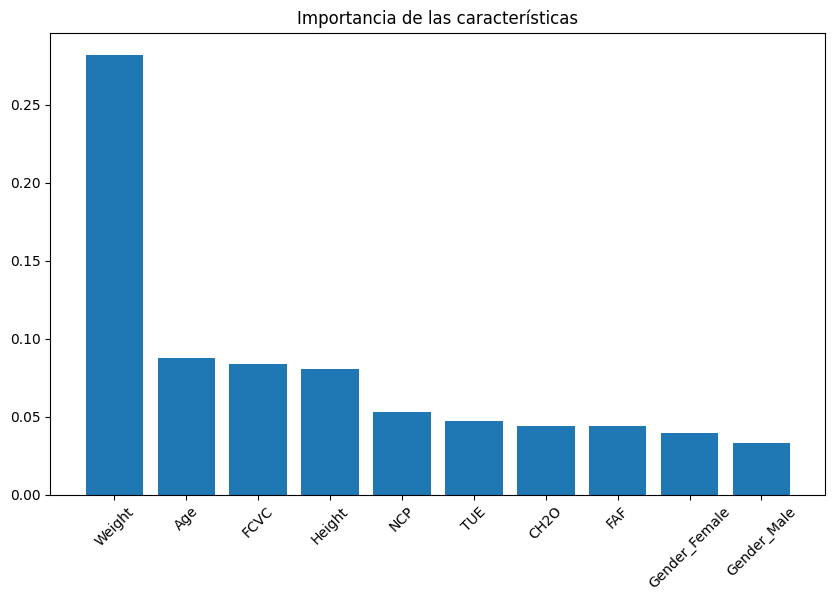

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características del modelo entrenado
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar las 10 características más importantes
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=45)
plt.show()


In [ ]:
# Obtener las importancias de las características y sus nombres
importances = best_model.feature_importances_
features = X.columns

# Ordenar las características por importancia
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = features[indices]

# Mostrar las 10 características más importantes y sus valores de importancia
for feature, importance in zip(sorted_features[:10], sorted_importances[:10]):
    print(f"{feature}: {importance}")


Weight: 0.28204005331410353
Age: 0.08729613807204403
FCVC: 0.08346572131937521
Height: 0.0803829525199765
NCP: 0.05268403863288597
TUE: 0.04730682200873122
CH2O: 0.044044096864373876
FAF: 0.043778059487453815
Gender_Female: 0.03955518744801827
Gender_Male: 0.033072781011765556


**Analisis de la importancia de las características**

Importancia de las Características.

En el modelo optimizado de Random Forest, se analizaron las características más importantes para la predicción de los niveles de obesidad. Los resultados son los siguientes:

**Peso (28.20%)**: La característica más importante, reflejando su influencia directa en la clasificación de los niveles de obesidad.

**Edad (8.73%)**: La segunda característica más importante, asociada con cambios metabólicos y de estilo de vida.

**Frecuencia de consumo de vegetales (8.35%)**: Un factor crucial relacionado con hábitos alimenticios saludables.

**Altura (8.04%)**: Junto con el peso, es fundamental para calcular el índice de masa corporal (IMC).

**Número de comidas principales al día (5.27%)**: Refleja patrones de alimentación asociados con el control del peso.

**Tiempo de uso de tecnología al día (4.73%)**: Indicador de un estilo de vida sedentario, asociado con la obesidad.

**Consumo de agua diaria (4.40%)**: Destaca la importancia de la hidratación en la gestión del peso.

**Frecuencia de actividad física (4.38%)**: Un factor clave para la prevención de la obesidad.

**Género (Femenino: 3.96%, Masculino: 3.31%)**: Aunque menos influyentes, las diferencias de género tienen un impacto moderado en la predicción.

**Conclusión:**

El peso es el factor más determinante en la predicción de los niveles de obesidad, seguido por la edad, los hábitos alimenticios y la altura. Estos resultados resaltan la importancia de un enfoque integral en la gestión del peso, que incluya factores como la dieta, la actividad física y otros aspectos del estilo de vida.

**Paso 2: Análisis de los Errores del Modelo**

Examinar los errores del modelo puede revelar patrones que no se detectaron durante el entrenamiento y pueden ser críticos para mejorar el modelo o para la implementación práctica.

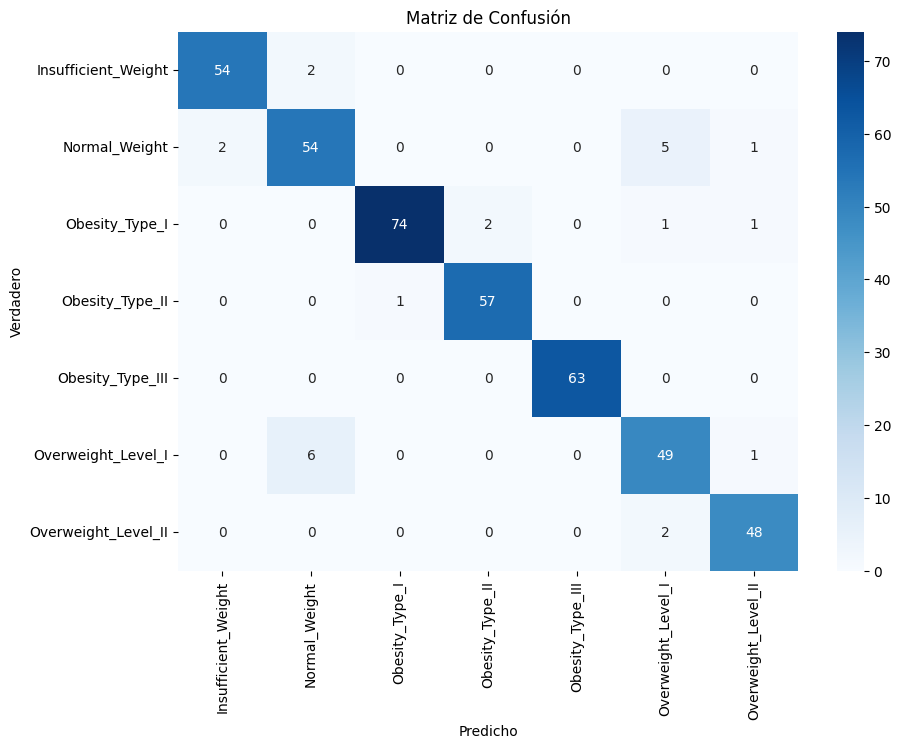

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matriz de Confusión")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()


# Mostrar la matriz de confusión
# print("Matriz de Confusión:")
# print(cm)

# Opcional: también se puede obtener la matriz de confusión en un formato tabular
# import pandas as pd
#
# cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
# print("\nMatriz de Confusión (formato tabular):")
# print(cm_df)

In [ ]:
# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Opcional: también se puede obtener la matriz de confusión en un formato tabular
import pandas as pd
#
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
print("\nMatriz de Confusión (formato tabular):")
print(cm_df)

Matriz de Confusión:
[[54  2  0  0  0  0  0]
 [ 2 54  0  0  0  5  1]
 [ 0  0 74  2  0  1  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 49  1]
 [ 0  0  0  0  0  2 48]]

Matriz de Confusión (formato tabular):
                     Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Insufficient_Weight                   54              2               0   
Normal_Weight                          2             54               0   
Obesity_Type_I                         0              0              74   
Obesity_Type_II                        0              0               1   
Obesity_Type_III                       0              0               0   
Overweight_Level_I                     0              6               0   
Overweight_Level_II                    0              0               0   

                     Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Insufficient_Weight                0                 0                   0   
Normal_Weight

**ANALISIS:**

Análisis de la Matriz de Confusión

La matriz de confusión del modelo optimizado muestra que la mayoría de las clases se clasifican correctamente, con algunas excepciones:

Insufficient_Weight:

Clasificado correctamente en su mayoría, con ligeras confusiones con Normal_Weight.

Normal_Weight:

Presenta confusiones principalmente con Overweight_Level_I, indicando características superpuestas entre estas clases.

Obesity_Type_I y II:

Bien diferenciadas, aunque existe una pequeña confusión entre ellas.

Obesity_Type_III:

Clasificación perfecta, lo que indica características muy distintivas.

Overweight_Level_I y II:

Aunque en su mayoría se clasifican correctamente, hay confusiones entre estas clases y Normal_Weight.

Conclusión:

El modelo es altamente efectivo en la clasificación de la mayoría de las clases, aunque existen áreas de mejora en la diferenciación entre Normal_Weight, Overweight_Level_I, y Overweight_Level_II. Se recomienda un análisis adicional y posibles ajustes en el modelo para mejorar la precisión en estas clases.


### **Subir el Archivo del modelo entrenado generado desde el PC a Google Colab**

In [ ]:
from google.colab import files

# Esto abrirá un cuadro de diálogo para seleccionar el archivo en tu PC
uploaded = files.upload()

In [ ]:
# Verificar que el Archivo Está en el Directorio:
!ls

modelo_obesidad.pkl  sample_data


Cargar el modelo entrenado, para uso en pruebas reales del modelo, evitando así tenere que reentrenarlo para poder hacer pruebas y obtener resultados predictivos.

In [ ]:
import joblib
# Cargar el modelo entrenado desde el archivo subido
modelo = joblib.load('modelo_obesidad.pkl')

**PRUEBA REAL DEL MODELO**

In [ ]:
# Prueba 1
import pandas as pd

def predecir_nivel_obesidad(modelo, input_data):
    """
    Función para predecir el nivel de obesidad dado un conjunto de datos de entrada.

    Parámetros:
    modelo: El modelo de Random Forest entrenado.
    input_data: Un diccionario que contiene las características de entrada.

    Retorna:
    La predicción del modelo.
    """
    # Crear un DataFrame con los datos de entrada en el orden adecuado
    X_nuevo = pd.DataFrame([input_data])

    # Hacer la predicción
    prediccion = modelo.predict(X_nuevo)

    return prediccion[0]

# Ejemplo de uso con las columnas correctas
datos_entrada = {
    'Age': 25,
    'Height': 1.75,
    'Weight': 70,
    'FCVC': 3,
    'NCP': 3,
    'CH2O': 2,
    'FAF': 2,
    'TUE': 3,
    'Gender_Female': 0,  # 1 para femenino, 0 para masculino
    'Gender_Male': 1,    # 1 para masculino, 0 para femenino
    'family_history_with_overweight_no': 0,   # 1 para NO, 0 para SI
    'family_history_with_overweight_yes': 1,  # 1 para SI, 0 para NO
    'FAVC_no': 1,   # 1 para NO, 0 para SI
    'FAVC_yes': 0,  # 1 para SI, 0 para NO
    'CAEC_Always': 0,       # 1 para SI, 0 para NO
    'CAEC_Frequently': 0,   # 1 para SI, 0 para NO
    'CAEC_Sometimes': 0,    # 1 para SI, 0 para NO
    'CAEC_no': 1,           # 1 para SI, 0 para NO
    'SMOKE_no': 1,          # 1 para NO, 0 para SI
    'SMOKE_yes': 0,         # 1 para SI, 0 para NO
    'SCC_no': 1,            # 1 para NO, 0 para SI
    'SCC_yes': 0,           # 1 para SI, 0 para NO
    'CALC_Always': 0,       # 1 para SI, 0 para NO
    'CALC_Frequently': 1,   # 1 para SI, 0 para NO
    'CALC_Sometimes': 0,    # 1 para SI, 0 para NO
    'CALC_no': 0,           # 1 para SI, 0 para NO
    'MTRANS_Automobile': 0,   # 1 para SI, 0 para NO
    'MTRANS_Bike': 0,         # 1 para SI, 0 para NO
    'MTRANS_Motorbike': 0,    # 1 para SI, 0 para NO
    'MTRANS_Public_Transportation': 1,  # 1 para SI, 0 para NO
    'MTRANS_Walking': 0       # 1 para SI, 0 para NO
}

# prediccion = predecir_nivel_obesidad(best_model, datos_entrada)
prediccion = predecir_nivel_obesidad(modelo, datos_entrada)
print(f"Predicción del nivel de obesidad: {prediccion}")


Predicción del nivel de obesidad: Normal_Weight


In [ ]:
# Prueba 2 - Datos reales tomados del dataset
import pandas as pd

def predecir_nivel_obesidad(modelo, input_data):
    """
    Función para predecir el nivel de obesidad dado un conjunto de datos de entrada.

    Parámetros:
    modelo: El modelo de Random Forest entrenado.
    input_data: Un diccionario que contiene las características de entrada.

    Retorna:
    La predicción del modelo.
    """
    # Crear un DataFrame con los datos de entrada en el orden adecuado
    X_nuevo = pd.DataFrame([input_data])

    # Hacer la predicción
    prediccion = modelo.predict(X_nuevo)

    return prediccion[0]

# Ejemplo de uso con las columnas correctas
datos_entrada = {
    'Age': 41,
    'Height': 1.8,
    'Weight': 99,
    'FCVC': 3,
    'NCP': 3,
    'CH2O': 2,
    'FAF': 2,
    'TUE': 1,
    'Gender_Female': 0,  # 1 para femenino, 0 para masculino
    'Gender_Male': 1,    # 1 para masculino, 0 para femenino
    'family_history_with_overweight_no': 1,   # 1 para NO, 0 para SI
    'family_history_with_overweight_yes': 0,  # 1 para SI, 0 para NO
    'FAVC_no': 0,   # 1 para NO, 0 para SI
    'FAVC_yes': 1,  # 1 para SI, 0 para NO
    'CAEC_Always': 0,       # 1 para SI, 0 para NO
    'CAEC_Frequently': 0,   # 1 para SI, 0 para NO
    'CAEC_Sometimes': 1,    # 1 para SI, 0 para NO
    'CAEC_no': 0,           # 1 para SI, 0 para NO
    'SMOKE_no': 1,          # 1 para NO, 0 para SI
    'SMOKE_yes': 0,         # 1 para SI, 0 para NO
    'SCC_no': 1,            # 1 para NO, 0 para SI
    'SCC_yes': 0,           # 1 para SI, 0 para NO
    'CALC_Always': 0,       # 1 para SI, 0 para NO
    'CALC_Frequently': 1,   # 1 para SI, 0 para NO
    'CALC_Sometimes': 0,    # 1 para SI, 0 para NO
    'CALC_no': 0,           # 1 para SI, 0 para NO
    'MTRANS_Automobile': 1,   # 1 para SI, 0 para NO
    'MTRANS_Bike': 0,         # 1 para SI, 0 para NO
    'MTRANS_Motorbike': 0,    # 1 para SI, 0 para NO
    'MTRANS_Public_Transportation': 0,  # 1 para SI, 0 para NO
    'MTRANS_Walking': 0       # 1 para SI, 0 para NO
}

prediccion = predecir_nivel_obesidad(modelo, datos_entrada)
print(f"Predicción del nivel de obesidad: {prediccion}")


Predicción del nivel de obesidad: Overweight_Level_I


In [ ]:
# Prueba 3 - Datos reales tomados del dataset
import pandas as pd

def predecir_nivel_obesidad(modelo, input_data):
    """
    Función para predecir el nivel de obesidad dado un conjunto de datos de entrada.

    Parámetros:
    modelo: El modelo de Random Forest entrenado.
    input_data: Un diccionario que contiene las características de entrada.

    Retorna:
    La predicción del modelo.
    """
    # Crear un DataFrame con los datos de entrada en el orden adecuado
    X_nuevo = pd.DataFrame([input_data])

    # Hacer la predicción
    prediccion = modelo.predict(X_nuevo)

    return prediccion[0]

# Ejemplo de uso con las columnas correctas
datos_entrada = {
    'Age': 23,
    'Height': 1.89,
    'Weight': 65,
    'FCVC': 3,
    'NCP': 3,
    'CH2O': 3,
    'FAF': 1,
    'TUE': 1,
    'Gender_Female': 0,  # 1 para femenino, 0 para masculino
    'Gender_Male': 1,    # 1 para masculino, 0 para femenino
    'family_history_with_overweight_no': 0,   # 1 para NO, 0 para SI
    'family_history_with_overweight_yes': 1,  # 1 para SI, 0 para NO
    'FAVC_no': 0,   # 1 para NO, 0 para SI
    'FAVC_yes': 1,  # 1 para SI, 0 para NO
    'CAEC_Always': 0,       # 1 para SI, 0 para NO
    'CAEC_Frequently': 1,   # 1 para SI, 0 para NO
    'CAEC_Sometimes': 0,    # 1 para SI, 0 para NO
    'CAEC_no': 0,           # 1 para SI, 0 para NO
    'SMOKE_no': 1,          # 1 para NO, 0 para SI
    'SMOKE_yes': 0,         # 1 para SI, 0 para NO
    'SCC_no': 1,            # 1 para NO, 0 para SI
    'SCC_yes': 0,           # 1 para SI, 0 para NO
    'CALC_Always': 0,       # 1 para SI, 0 para NO
    'CALC_Frequently': 0,   # 1 para SI, 0 para NO
    'CALC_Sometimes': 1,    # 1 para SI, 0 para NO
    'CALC_no': 0,           # 1 para SI, 0 para NO
    'MTRANS_Automobile': 0,   # 1 para SI, 0 para NO
    'MTRANS_Bike': 0,         # 1 para SI, 0 para NO
    'MTRANS_Motorbike': 0,    # 1 para SI, 0 para NO
    'MTRANS_Public_Transportation': 1,  # 1 para SI, 0 para NO
    'MTRANS_Walking': 0       # 1 para SI, 0 para NO
}

prediccion = predecir_nivel_obesidad(modelo, datos_entrada)
print(f"Predicción del nivel de obesidad: {prediccion}")

Predicción del nivel de obesidad: Insufficient_Weight


### **Otra presentación con controles, sliders y selectores para escoger los valores de los parametros necesarios para que el modelo haga la predicción**

In [ ]:
!pip install ipywidgets


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML

# Definir la función para predecir el nivel de obesidad
def predecir_nivel_obesidad(modelo, input_data):
    """
    Función para predecir el nivel de obesidad dado un conjunto de datos de entrada.

    Parámetros:
    modelo: El modelo de Random Forest entrenado.
    input_data: Un diccionario que contiene las características de entrada.

    Retorna:
    La predicción del modelo.
    """
    # Crear un DataFrame con los datos de entrada en el orden adecuado
    X_nuevo = pd.DataFrame([input_data])

    # Hacer la predicción
    prediccion = modelo.predict(X_nuevo)

    return prediccion[0]

# Crear sliders y botones de selección para los datos de entrada
age_slider = widgets.IntSlider(value=23, min=0, max=100, step=1, description='Edad')
height_slider = widgets.FloatSlider(value=1.89, min=1.0, max=2.5, step=0.01, description='Altura (en metros)')
weight_slider = widgets.FloatSlider(value=65, min=30, max=200, step=0.1, description='Peso (en Kg)')
fcvc_slider = widgets.IntSlider(value=3, min=0, max=3, step=1, description='FCVC-Frecuencia de consumo de vegetales (0-3)')
ncp_slider = widgets.IntSlider(value=3, min=0, max=4, step=1, description='NCP-#Comidas princp al día ')
ch2o_slider = widgets.IntSlider(value=3, min=0, max=3, step=1, description='CH2O-Ltr agua al día - ')
faf_slider = widgets.IntSlider(value=1, min=0, max=3, step=1, description='FAF-Frec actividad física')
tue_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='TUE-Horas de uso de tecnología al día')

gender_select = widgets.ToggleButtons(
    options=[('Female', 0), ('Male', 1)],
    description='Género'
)

family_history_select = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Family_history Hist fam de sobrepeso'
)

favc_select = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='FAVC - Consumo frecuente de alimentos altos en calorías'
)

caec_select = widgets.RadioButtons(
    options=['Always', 'Frequently', 'Sometimes', 'No'],
    description='CAEC - Frec comer entre comidas'
)

smoke_select = widgets.ToggleButtons(
    options=[('No', 1), ('Yes', 0)],
    description='Usted Fuma - SMOKE'
)

scc_select = widgets.ToggleButtons(
    options=[('No', 1), ('Yes', 0)],
    description='SCC - Monitorea las calorías que consume'
)

calc_select = widgets.RadioButtons(
    options=['Always', 'Frequently', 'Sometimes', 'No'],
    description='CALC - Frec consumo alcohol'
)

mtrans_select = widgets.Select(
    options=['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'],
    description='MTRANS Medio de Transporte utilizado'
)

# Crear un botón para hacer la predicción
button = widgets.Button(description="Hacer Predicción")

# Definir la variable output para mostrar los resultados
output = widgets.Output()

# Display widgets junto con el output
display(age_slider, height_slider, weight_slider, fcvc_slider, ncp_slider, ch2o_slider,
        faf_slider, tue_slider, gender_select, family_history_select, favc_select,
        caec_select, smoke_select, scc_select, calc_select, mtrans_select, button, output)

# Función para obtener los datos de entrada desde los widgets
def get_input_data():
    datos_entrada = {
        'Age': age_slider.value,
        'Height': height_slider.value,
        'Weight': weight_slider.value,
        'FCVC': fcvc_slider.value,
        'NCP': ncp_slider.value,
        'CH2O': ch2o_slider.value,
        'FAF': faf_slider.value,
        'TUE': tue_slider.value,
        'Gender_Female': 1 if gender_select.value == 0 else 0,
        'Gender_Male': 1 if gender_select.value == 1 else 0,
        'family_history_with_overweight_no': 1 if family_history_select.value == 0 else 0,
        'family_history_with_overweight_yes': 1 if family_history_select.value == 1 else 0,
        'FAVC_no': 1 if favc_select.value == 0 else 0,
        'FAVC_yes': 1 if favc_select.value == 1 else 0,
        'CAEC_Always': 1 if caec_select.value == 'Always' else 0,
        'CAEC_Frequently': 1 if caec_select.value == 'Frequently' else 0,
        'CAEC_Sometimes': 1 if caec_select.value == 'Sometimes' else 0,
        'CAEC_no': 1 if caec_select.value == 'No' else 0,
        'SMOKE_no': 1 if smoke_select.value == 1 else 0,
        'SMOKE_yes': 1 if smoke_select.value == 0 else 0,
        'SCC_no': 1 if scc_select.value == 1 else 0,
        'SCC_yes': 1 if scc_select.value == 0 else 0,
        'CALC_Always': 1 if calc_select.value == 'Always' else 0,
        'CALC_Frequently': 1 if calc_select.value == 'Frequently' else 0,
        'CALC_Sometimes': 1 if calc_select.value == 'Sometimes' else 0,
        'CALC_no': 1 if calc_select.value == 'No' else 0,
        'MTRANS_Automobile': 1 if mtrans_select.value == 'Automobile' else 0,
        'MTRANS_Bike': 1 if mtrans_select.value == 'Bike' else 0,
        'MTRANS_Motorbike': 1 if mtrans_select.value == 'Motorbike' else 0,
        'MTRANS_Public_Transportation': 1 if mtrans_select.value == 'Public_Transportation' else 0,
        'MTRANS_Walking': 1 if mtrans_select.value == 'Walking' else 0
    }
    return datos_entrada

# Definir la función que será llamada al presionar el botón
def on_button_clicked(b):
    input_data = get_input_data()
    prediccion = predecir_nivel_obesidad(modelo, input_data)
    with output:
        output.clear_output()  # Limpiar la salida anterior
        display(HTML(f"<h2><b>Predicción del nivel de obesidad: {prediccion}</b></h2>"))

# Asignar la función al evento de clic del botón
button.on_click(on_button_clicked)


IntSlider(value=23, description='Edad')

FloatSlider(value=1.89, description='Altura (en metros)', max=2.5, min=1.0, step=0.01)

FloatSlider(value=65.0, description='Peso (en Kg)', max=200.0, min=30.0)

IntSlider(value=3, description='FCVC-Frecuencia de consumo de vegetales (0-3)', max=3)

IntSlider(value=3, description='NCP-#Comidas princp al día ', max=4)

IntSlider(value=3, description='CH2O-Ltr agua al día - ', max=3)

IntSlider(value=1, description='FAF-Frec actividad física', max=3)

IntSlider(value=1, description='TUE-Horas de uso de tecnología al día', max=5)

ToggleButtons(description='Género', options=(('Female', 0), ('Male', 1)), value=0)

ToggleButtons(description='Family_history Hist fam de sobrepeso', options=(('No', 0), ('Yes', 1)), value=0)

ToggleButtons(description='FAVC - Consumo frecuente de alimentos altos en calorías', options=(('No', 0), ('Yes…

RadioButtons(description='CAEC - Frec comer entre comidas', options=('Always', 'Frequently', 'Sometimes', 'No'…

ToggleButtons(description='Usted Fuma - SMOKE', options=(('No', 1), ('Yes', 0)), value=1)

ToggleButtons(description='SCC - Monitorea las calorías que consume', options=(('No', 1), ('Yes', 0)), value=1…

RadioButtons(description='CALC - Frec consumo alcohol', options=('Always', 'Frequently', 'Sometimes', 'No'), v…

Select(description='MTRANS Medio de Transporte utilizado', options=('Automobile', 'Bike', 'Motorbike', 'Public…

Button(description='Hacer Predicción', style=ButtonStyle())

Output()

## **Actividad 8: Conclusiones y Recomendaciones del Modelo**

**Informe Final del Proyecto de Predicción de Niveles de Obesidad**

1. Introducción

El objetivo de este proyecto es desarrollar un modelo predictivo capaz de estimar los niveles de obesidad en individuos, basándose en sus características demográficas, hábitos alimenticios y estilo de vida. Se ha utilizado un conjunto de datos que incluye variables como la edad, el peso, la altura, los hábitos alimenticios, la frecuencia de actividad física, entre otros.


2. Preparación de Datos

2.1 Codificación y Normalización

Se aplicó una codificación one-hot a las variables categóricas, como el género y los hábitos de alimentación, para transformarlas en un formato adecuado para el modelo de aprendizaje automático. Posteriormente, se normalizaron las variables numéricas para asegurar que todas las características estuvieran en la misma escala, lo cual es crucial para mejorar la convergencia y el rendimiento de los modelos.

2.2 Conjunto de Datos Final

El conjunto de datos final incluyó las siguientes características después de la codificación y normalización:

Características numéricas: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE.

Características categóricas (codificadas): Gender_Female, Gender_Male, family_history_with_overweight_no, family_history_with_overweight_yes, FAVC_no, FAVC_yes, CAEC_Always, CAEC_Frequently, CAEC_Sometimes, CAEC_no, SMOKE_no, SMOKE_yes, SCC_no, SCC_yes, CALC_Always, CALC_Frequently, CALC_Sometimes, CALC_no, MTRANS_Automobile, MTRANS_Bike, MTRANS_Motorbike, MTRANS_Public_Transportation, MTRANS_Walking.

3. Modelado

3.1 Selección de Modelos

Se evaluaron tres modelos principales:

Regresión Logística, Árbol de Decisión, Random Forest


El modelo Random Forest fue seleccionado para la optimización, debido a su capacidad para manejar relaciones complejas en los datos y su rendimiento robusto.


3.2 Optimización de Hiperparámetros

Se llevó a cabo una optimización de hiperparámetros utilizando búsqueda en cuadrícula, lo que resultó en la siguiente configuración óptima:

bootstrap: False
max_depth: 20
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100


3.3 Resultados de la Evaluación

3.3.1 Evaluación en Conjunto de Prueba

El modelo optimizado fue evaluado en el conjunto de prueba con los siguientes resultados:

Precisión: 94.33%
Sensibilidad: 94.33%

Estos resultados indican que el modelo tiene una alta capacidad para generalizar a datos no vistos, clasificando correctamente la gran mayoría de las instancias.

3.3.2 Validación Cruzada

Para asegurar la robustez del modelo, se realizó una validación cruzada con 5 folds, obteniendo un promedio de precisión del 94.55%. Esto refuerza la confianza en el modelo y su capacidad para desempeñarse bien en diferentes subconjuntos de datos.

4. Importancia de las Características

El análisis de la importancia de las características reveló que las variables más influyentes en la predicción del nivel de obesidad fueron:

Peso (28.20%)
Edad (8.73%)
Frecuencia de consumo de vegetales (8.35%)
Altura (8.04%)

Estas características son las más determinantes en la clasificación de los niveles de obesidad, lo que es coherente con la literatura médica y los conocimientos previos sobre la obesidad.

5. Análisis de Errores

La matriz de confusión mostró que, aunque el modelo clasifica correctamente la mayoría de las instancias, existen algunas áreas de mejora:

Confusión entre Normal_Weight y Overweight_Level_I: Esto sugiere que estas clases tienen características superpuestas que el modelo tiene dificultades para diferenciar.

Clasificación perfecta en Obesity_Type_III: El modelo es muy preciso en la clasificación de los casos más graves de obesidad, lo que indica que estas instancias tienen características distintivas claras.

6. Prueba de Predicción

Se implementó una función de predicción que permite al usuario ingresar nuevas instancias y obtener una predicción del nivel de obesidad basado en las características proporcionadas. La función está alineada con las columnas reales del dataset utilizado para entrenar el modelo, asegurando la precisión en las predicciones.

7. Conclusión y Recomendaciones

El modelo optimizado de Random Forest ha demostrado ser una herramienta confiable y efectiva para la predicción de niveles de obesidad, con un rendimiento consistente tanto en la validación cruzada como en el conjunto de prueba. Dada su robustez y alta precisión, se recomienda su implementación en aplicaciones prácticas para la evaluación del riesgo de obesidad.


Recomendaciones:

Monitoreo continuo: Mantener un monitoreo del rendimiento del modelo en nuevos datos para asegurar que siga proporcionando resultados precisos.

Mejora en la diferenciación: Considerar la recolección de más datos o la implementación de técnicas de ingeniería de características para mejorar la diferenciación entre Normal_Weight y Overweight_Level_I.

Extensión del modelo: Explorar la integración del modelo en una plataforma web o una aplicación móvil para facilitar su uso por parte de profesionales de la salud.